<a href="https://colab.research.google.com/github/DoczyKristof/BevGepiTan/blob/main/BevGepTan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [122]:
data = pd.read_csv('vgsales.csv')
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [123]:
data.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [124]:
data= data.dropna()
data.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [125]:
data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [126]:
data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


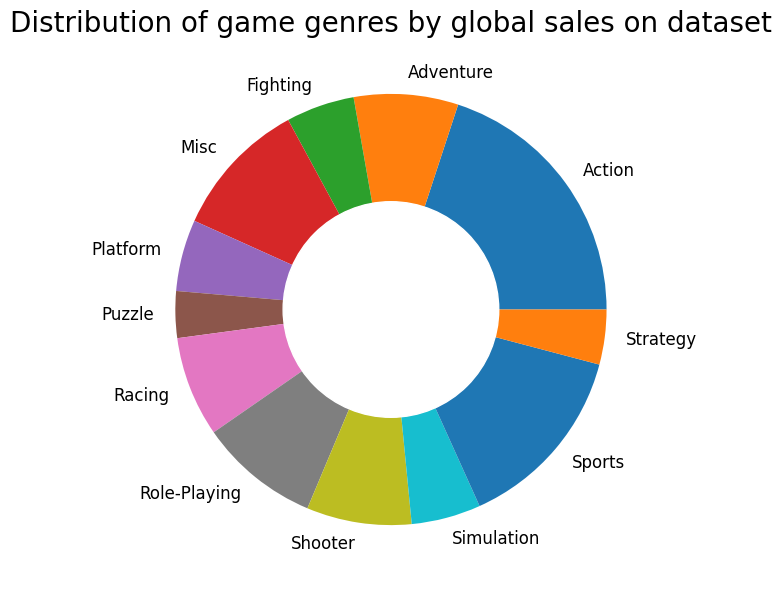

In [128]:
import matplotlib as mpl
game = data.groupby("Genre")["Global_Sales"].count()
plt.figure(figsize=(7,7))
plt.pie(game, labels=game.index)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of game genres by global sales on dataset", fontsize=20)
plt.show()

<ipython-input-129-0ebdb636875d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())
<ipython-input-129-0ebdb636875d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.178027 -0.400315 -0.379137 -0.269323    -0.332735   
Year          0.178027  1.000000 -0.091285  0.006108 -0.169387     0.041128   
NA_Sales     -0.400315 -0.091285  1.000000  0.768923  0.451283     0.634518   
EU_Sales     -0.379137  0.006108  0.768923  1.000000  0.436379     0.726256   
JP_Sales     -0.269323 -0.169387  0.451283  0.436379  1.000000     0.290559   
Other_Sales  -0.332735  0.041128  0.634518  0.726256  0.290559     1.000000   
Global_Sales -0.426975 -0.074647  0.941269  0.903264  0.612774     0.747964   

              Global_Sales  
Rank             -0.426975  
Year             -0.074647  
NA_Sales          0.941269  
EU_Sales          0.903264  
JP_Sales          0.612774  
Other_Sales       0.747964  
Global_Sales      1.000000  


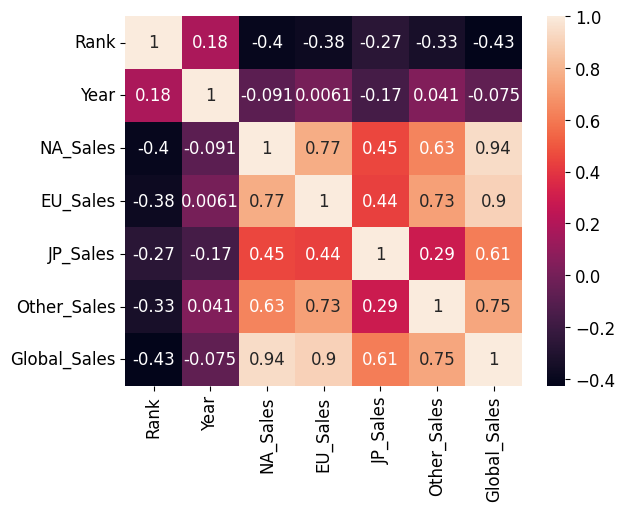

In [129]:
print(data.corr())
sns.heatmap(data.corr(), annot=True)
plt.show()

In [130]:
x = data[["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y = data["Global_Sales"]

In [131]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [132]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
y_pred_dtr = model.predict(xtest)
y_pred_dtr

array([0.57, 0.07, 0.19, ..., 0.09, 0.13, 0.19])

In [133]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
y_pred_lr = model.predict(xtest)
y_pred_lr

array([0.56992573, 0.06056453, 0.19027598, ..., 0.09048589, 0.13035485,
       0.18025191])

In [140]:
pickle.dump(model, open('model_trained.pkl', 'wb'))

In [137]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(ytest, y_pred_dtr)
print("Mean Absolute Error for DecisionTreeRegressor:", mae)

mae = mean_absolute_error(ytest, y_pred_lr)
print("Mean Absolute Error for LinearRegression:", mae)
#1 - 0 linearRegression

Mean Absolute Error for DecisionTreeRegressor: 0.0183829395520101
Mean Absolute Error for LinearRegression: 0.0031061418784739227


In [138]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(ytest, y_pred_dtr)
print("Mean Squared Error for DecisionTreeRegressor:", mse)

mse = mean_squared_error(ytest, y_pred_lr)
print("Mean Squared Error for LinearRegression:", mse)
#2 - 0 linearRegression

Mean Squared Error for DecisionTreeRegressor: 0.6815066891684564
Mean Squared Error for LinearRegression: 2.8539540789498857e-05


In [136]:
from sklearn.metrics import r2_score

r2 = r2_score(ytest, y_pred_dtr)
print("R-squared for DecisionTreeRegressor:", r2)

r2 = r2_score(ytest, y_pred_lr)
print("R-squared for LinearRegression:", r2)
#3 - 0 linearRegression

R-squared for DecisionTreeRegressor: 0.8406938226426494
R-squared for LinearRegression: 0.9999933287153024


In [114]:
#A metrikák alapján a LineárRegression teljesítménye jobb tehát őt viszem tovább